In [1]:
# install.packages("FactoMineR", repos="https://cloud.r-project.org/")
library(FactoMineR)
library(reshape)
R.Version()$version.string

Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'reshape' was built under R version 3.6.3"

[1] "R version 3.6.1 (2019-07-05)"

In [2]:
tabl_cont_lex_large=read.csv("tabl_lex_alcaldes_ideologia.csv")
tabl_cont_lex_categorias=read.csv("tabl_lex_alcaldes_categorias.csv", row.names=1)
tabl_cont_lex_ideol=tabl_cont_lex_large[tabl_cont_lex_large$termino %in% rownames(tabl_cont_lex_categorias),]
rownames(tabl_cont_lex_ideol)=tabl_cont_lex_ideol$termino
tabl_cont_lex_ideol$Category=tabl_cont_lex_categorias$Category

In [3]:
columns_MCA=c(
    'Antes','Después',
    'Arauca','Barranquilla','Bogotá','Bucaramanga','Cali','Cúcuta','Ibagué','Medellín','Montería','Neiva','Pasto','Popayán','Riohacha','Santa.Marta','Sincelejo','Tunja','Valledupar','Villavicencio',
#     'Derecha_Centro','Izquierda_Centro','Derecha_Extrema','Izquierda_Extrema',
    'Derecha','Izquierda'
)

In [4]:
tabl_lex_alcaldes_agg=aggregate(. ~ Category, tabl_cont_lex_ideol[,c(columns_MCA,"Category")], sum)
rownames(tabl_lex_alcaldes_agg)=tabl_lex_alcaldes_agg$Category
tabl_lex_alcaldes_agg=subset(tabl_lex_alcaldes_agg, select = -c(Category) )

In [5]:
lex_cont_tbl=tabl_lex_alcaldes_agg
# lex_cont_tbl=tabl_cont_lex_ideol[,columns_MCA]
tail(lex_cont_tbl)

,Antes,Después,Arauca,Barranquilla,Bogotá,Bucaramanga,Cali,Cúcuta,Ibagué,Medellín,...,Pasto,Popayán,Riohacha,Santa.Marta,Sincelejo,Tunja,Valledupar,Villavicencio,Derecha,Izquierda
Family,82,257,5,21,44,20,15,5,14,28,...,9,10,20,35,34,21,15,13,148,191
Health,151,514,2,30,112,47,45,10,27,69,...,28,32,21,64,16,30,18,53,203,462
Home,128,335,2,32,96,18,29,8,5,25,...,14,22,18,38,19,16,21,43,168,295
Negative emotions,44,104,0,11,28,6,21,6,8,14,...,0,2,8,2,5,9,10,9,51,97
Positive emotions,870,1060,30,121,321,74,115,41,54,163,...,74,100,82,227,82,75,66,169,645,1285
Sadness,13,125,3,20,7,4,20,3,4,19,...,3,7,1,5,4,9,18,4,60,78


In [6]:
colnames(lex_cont_tbl)

[1] "Antes"         "Después"       "Arauca"        "Barranquilla" 
 [5] "Bogotá"        "Bucaramanga"   "Cali"          "Cúcuta"       
 [9] "Ibagué"        "Medellín"      "Montería"      "Neiva"        
[13] "Pasto"         "Popayán"       "Riohacha"      "Santa.Marta"  
[17] "Sincelejo"     "Tunja"         "Valledupar"    "Villavicencio"
[21] "Derecha"       "Izquierda"

In [7]:
ca2 = CA(lex_cont_tbl, graph = FALSE)

In [8]:
summary(ca2)
summary(ca2, nbelements=Inf, file="out_CA.txt")
desc_tab=dimdesc(ca2)


Call:
CA(X = lex_cont_tbl, graph = FALSE) 

The chi square of independence between the two variables is equal to 704.2503 (p-value =  9.332269e-67 ).

Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               0.015   0.006   0.005   0.003   0.002   0.002   0.001
% of var.             43.564  17.522  14.446   7.483   6.253   5.863   3.274
Cumulative % of var.  43.564  61.086  75.533  83.015  89.268  95.131  98.405
                       Dim.8
Variance               0.001
% of var.              1.595
Cumulative % of var. 100.000

Rows
                    Iner*1000    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Achievements      |     3.399 |  0.065 11.087  0.498 |  0.041 10.848  0.196 |
Anger             |     3.024 | -0.002  0.001  0.000 | -0.163 14.621  0.297 |
Anxiety           |     1.525 | -0.125  1.865  0.187 | -0.146  6.308  0.254 |
Family            |     5.270 | -0.207 14.179  0.411 |  0.056  2.558  0.030 |
Health          

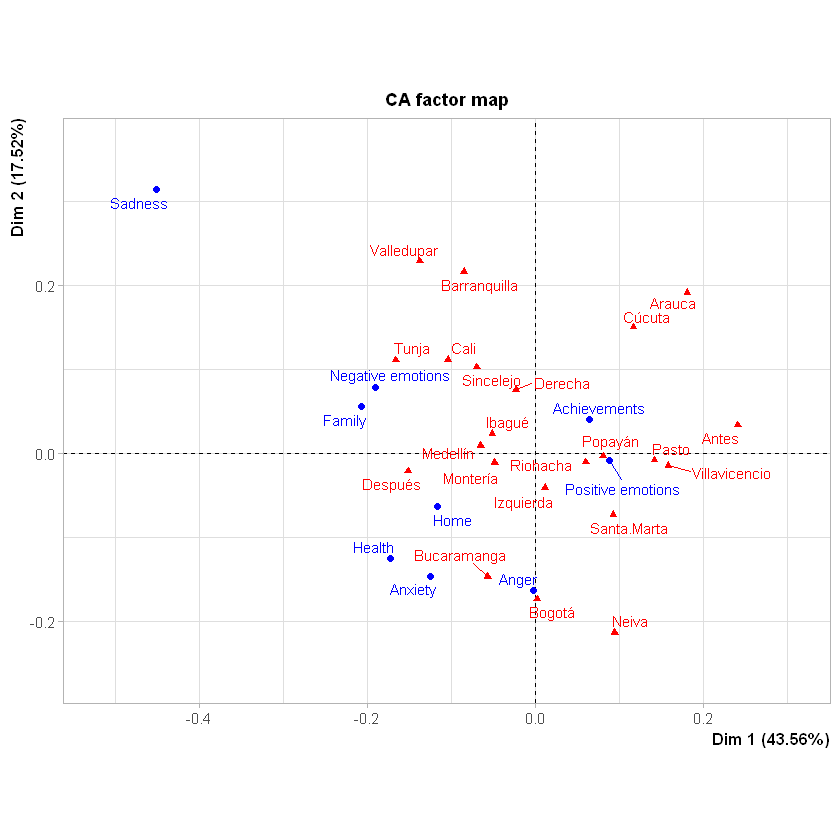

In [9]:
plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.8,
    selectRow="cos2 30"
    )

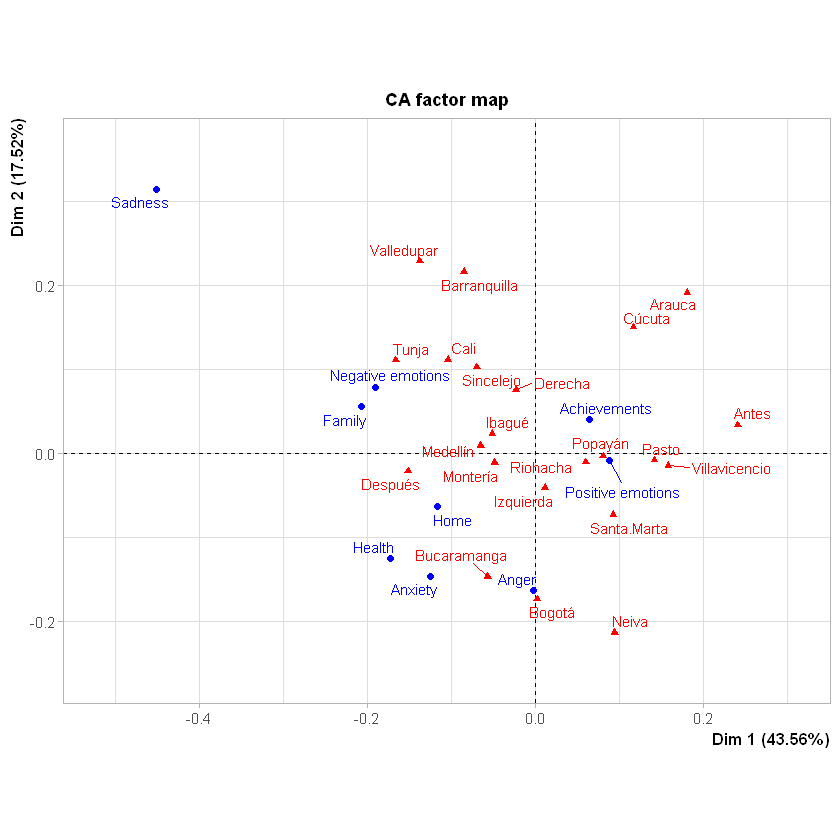

In [10]:
plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.8,
    selectRow="contrib 30"
    )

In [11]:
# pdf("ca_alcaldes_top5.pdf", width = 12, height = 12)
pdf("ca_alcaldes.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.9,
    cex=.15,
    )
dev.off()


png 
  2

In [12]:
# pdf("ca_alcaldes_top5_contrib_100.pdf", width = 12, height = 12)
pdf("ca_alcaldes_contrib_100.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.9,
    cex=.25,
    selectRow="contrib 100"
    )
dev.off()


png 
  2

In [13]:
# pdf("ca_alcaldes_top5_cos2_100.pdf", width = 12, height = 12)
pdf("ca_alcaldes_cos2_100.pdf", width = 12, height = 12)

plot(ca2,
    shadowtext=TRUE,
    unselect=.95,
    cex=.5,
    selectRow="cos2 100"
    )
dev.off()


png 
  2

In [14]:
coords=rbind(data.frame(ca2$col$coord[,c(1,2,3)]),data.frame(ca2$row$coord[,c(1,2,3)]))
colnames(coords)=c("x_pos","y_pos","z_pos")

In [15]:
write.csv(lex_cont_tbl, "lex_cont_tbl_output_R.csv", fileEncoding ="UTF-8")
write.csv(coords, "nodes_coords.csv", fileEncoding ="UTF-8")

In [16]:
coords

,x_pos,y_pos,z_pos
Antes,0.241374832,0.033874665,-0.009001457
Después,-0.151130297,-0.021209702,0.005636018
Arauca,0.181493596,0.191557623,0.044886073
Barranquilla,-0.084657834,0.216536211,0.043518989
Bogotá,0.002703912,-0.173466774,-0.016155216
Bucaramanga,-0.056380864,-0.146408214,-0.122868407
Cali,-0.103305253,0.111597054,-0.171062892
Cúcuta,0.117197277,0.150204816,-0.126375081
Ibagué,-0.050791253,0.023369017,-0.062065846
Medellín,-0.064457834,0.009431391,-0.069398216
